In [22]:
import pandas as pd

def read_library(file_path):  
    df = pd.read_excel(file_path)
    index_list = df.iloc[:, 0]
    library = df.iloc[:, 1]
    return index_list, library

# 读取文库列表，从索引1开始
index_list, library = read_library('/home/liuycomputing/lby_FASTQ_data_202408/refLib-SEQ2210.xlsx')
lib_len = len(library[0])

In [23]:
import pickle

def load_error_dict_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

file_folder = '/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/'
folder_name = 'YZX-148_6'
error_file_name = '/whole_error_dict_1.pkl'
whole_read_error_dict = load_error_dict_pickle(file_path=file_folder+folder_name+error_file_name)

In [24]:
import numpy as np

zero_num = 0
no_index_list = []

for idx, seq in zip(index_list, library):
    right_list = np.array(whole_read_error_dict[idx]['Right'], dtype=float)
    deletion_list = np.array(whole_read_error_dict[idx]['Deletion'], dtype=float)
    insertion_list = np.array(whole_read_error_dict[idx]['Insertion'], dtype=float)
    substitution_list = np.array(whole_read_error_dict[idx]['Substitution'], dtype=float)
    total_num = right_list + deletion_list + insertion_list + substitution_list

    # if total_num[0] < 1:
    if total_num[0] >= 1:
        no_index_list.append((idx, seq))  # 保存 index 和对应的 DNA 序列
        zero_num += 1

print(zero_num)
print(no_index_list)

10794
[('s1', 'ACACGACGCTCTTCCGATCTCTTACGCTCATAGTGTAAGAAGGGTCTGGTCGTGCATCTCCAAGTTCACATAGTGCAAGTTAGGTACGCGTAATAGATAGCTTATTCAAGACAACACAACAGATCGGAAGAGCACACGTCT'), ('s2', 'ACACGACGCTCTTCCGATCTCTTGTTCGATACATGGTAGTGTTTCCTGCAGTGCGATGATCTTGTTCACATAGTGGTTCGGCCCGGCGGTAGATCGATATCTTGTTCACAACAAGACAACAGATCGGAAGAGCACACGTCT'), ('s3', 'ACACGACGCTCTTCCGATCTCAAGTTCGAGTCACGGAAGACAGGTCATGCAGCACGATTGCAAACTACAGGCACGGCTCGTCCCGCATTCCGTATATCATCTGGTTCAGTACAATACAACAGATCGGAAGAGCACACGTCT'), ('s4', 'ACACGACGCTCTTCCGATCTCAAATTAGTAGCGTGTAAGCACTTGCATTGAGATCGATACCAAGCTCATAGCTGACACTCCTTTAGCGCTAGATAGCAACCACACTAGCAACACGACAACAGATCGGAAGAGCACACGTCT'), ('s5', 'ACACGACGCTCTTCCGATCTCAAGCTCATATAACGGCAGAGAGGAACGGTTAATCGAGGACAACTTCGCAGCGCGATTCGAGGGTCATTACGTTGGATGTCAAGCTCACAACACTACAACAGATCGGAAGAGCACACGTCT'), ('s6', 'ACACGACGCTCTTCCGATCTCAAGTTCGCATCGCGGCTCGCGGGTGACCTCTAACGATACCTTACTAGAGGCGTGGTCTGGAGGTGCGGAGTGCTGAGGCCTTGTTCGATACACAACAACAGATCGGAAGAGCACACGTCT'), ('s7', 'ACACGACGCTCTTCCGATCTCAACTTAGAGGAGTGGAAGAGTTTGCTGGAGTGCTGCAACCACGTTA

In [25]:
import csv

# 方法：写入未读出索引及其对应的 DNA 序列
def write_to_csv(filename, sequences):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # 写入表头
        writer.writerow(['Sequence_ID', 'DNA_Sequence'])
        # 写入数据
        for seq_id, sequence in sequences:
            writer.writerow([seq_id, sequence])

# 生成输出文件路径
# output_file = file_folder + folder_name + "_not_covered_sequences.csv"
output_file = file_folder + folder_name + "_covered_sequences.csv"

# 调用函数保存 no_index_list
write_to_csv(output_file, no_index_list)  


In [26]:
import numpy as np

def compute_error_rate(lib_len, index_list, error_dict):
    # 初始化整个集的lib
    complete_set_dict = {}
    complete_set_dict['Right'] = np.zeros(lib_len)
    complete_set_dict['Deletion'] = np.zeros(lib_len)
    complete_set_dict['Insertion'] = np.zeros(lib_len)
    complete_set_dict['Substitution'] = np.zeros(lib_len)
    complete_set_dict['Total'] = np.zeros(lib_len)

    
    # 计算错误率
    rate_dict, global_error_dict = {}, {}
    for i in index_list:
        rate_dict[i] = {}
        global_error_dict[i] = {}

        right_list = np.array(error_dict[i]['Right'], dtype=float)
        deletion_list = np.array(error_dict[i]['Deletion'], dtype=float)
        insertion_list = np.array(error_dict[i]['Insertion'], dtype=float)
        substitution_list = np.array(error_dict[i]['Substitution'], dtype=float)
        total_num = right_list + deletion_list + insertion_list + substitution_list

        if np.mean(total_num) != 0:
            rate_dict[i]['Right-Rate'] = (right_list / total_num).tolist()
            rate_dict[i]['Deletion-Rate'] = (deletion_list / total_num).tolist()
            rate_dict[i]['Insertion-Rate'] = (insertion_list / total_num).tolist()
            rate_dict[i]['Substitution-Rate'] = (substitution_list / total_num).tolist()

            global_error_dict[i]['Right'] = (right_list).tolist()
            global_error_dict[i]['Deletion'] = (deletion_list).tolist()
            global_error_dict[i]['Insertion'] = (insertion_list).tolist()
            global_error_dict[i]['Substitution'] = (substitution_list).tolist()
            global_error_dict[i]['Total'] = (total_num).tolist()

        else:
            rate_dict[i]['Right-Rate'] = [0] * lib_len
            rate_dict[i]['Deletion-Rate'] = [0] * lib_len
            rate_dict[i]['Insertion-Rate'] = [0] * lib_len
            rate_dict[i]['Substitution-Rate'] = [0] * lib_len

            global_error_dict[i]['Right'] = [0] * lib_len
            global_error_dict[i]['Deletion'] = [0] * lib_len
            global_error_dict[i]['Insertion'] = [0] * lib_len
            global_error_dict[i]['Substitution'] = [0] * lib_len
            global_error_dict[i]['Total'] = [0] * lib_len

        complete_set_dict['Right'] += right_list
        complete_set_dict['Deletion'] += deletion_list
        complete_set_dict['Insertion'] += insertion_list
        complete_set_dict['Substitution'] += substitution_list
        complete_set_dict['Total'] += total_num
        
    return rate_dict, complete_set_dict, global_error_dict

# 分条错误率
rate_dict, complete_set_dict, global_error_dict = compute_error_rate(lib_len, index_list, whole_read_error_dict)

1526580


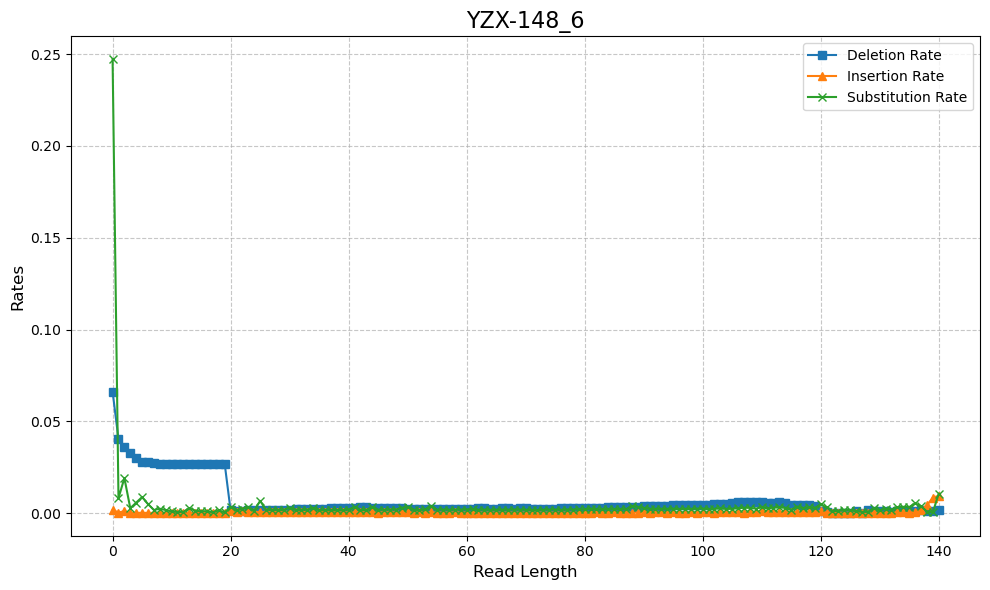

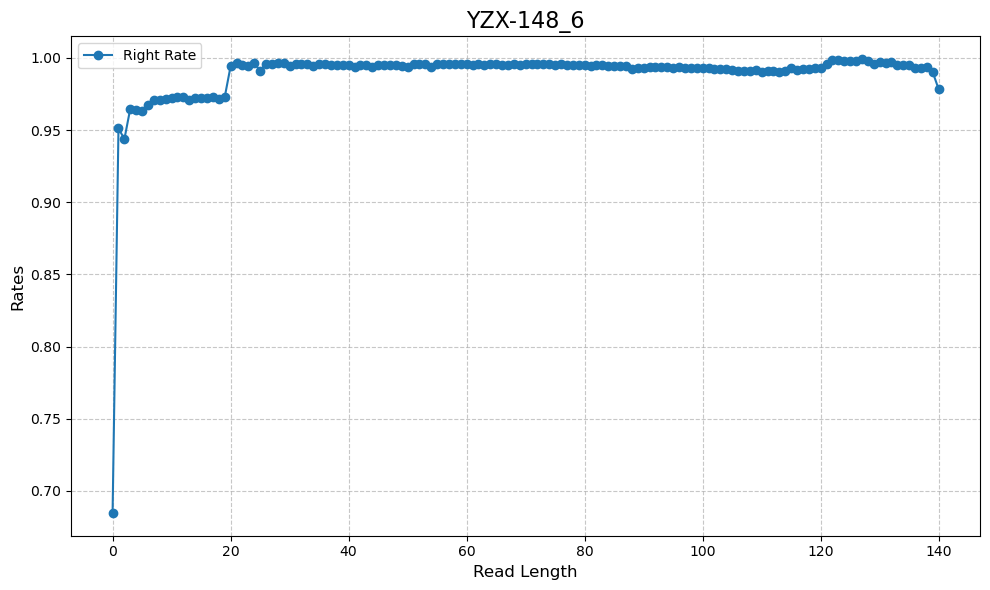

In [27]:
import matplotlib.pyplot as plt

# 定义函数来计算完整的错误率
def compute_complete_error_rate(complete_set_dict):
    right_list = np.array(complete_set_dict['Right'], dtype=float)
    deletion_list = np.array(complete_set_dict['Deletion'], dtype=float)
    insertion_list = np.array(complete_set_dict['Insertion'], dtype=float)
    substitution_list = np.array(complete_set_dict['Substitution'], dtype=float)
    total_num = np.array(complete_set_dict['Total'], dtype=float)

    print(int(total_num[0]))

    complete_set_dict['Right-Rate'] = (right_list / total_num).tolist()
    complete_set_dict['Deletion-Rate'] = (deletion_list / total_num).tolist()
    complete_set_dict['Insertion-Rate'] = (insertion_list / total_num).tolist()
    complete_set_dict['Substitution-Rate'] = (substitution_list / total_num).tolist()

    return complete_set_dict

# 改成绘制在一张图上的函数
def plot_complete_error_rates(complete_rate_dict, figure_name):
    x = range(len(complete_rate_dict['Right-Rate']))  # 假设每个数据点有序
    plt.figure(figsize=(10, 6))  # 设置图形大小

    # 绘制每种错误率
    plt.plot(x, complete_rate_dict['Deletion-Rate'], label='Deletion Rate', marker='s')
    plt.plot(x, complete_rate_dict['Insertion-Rate'], label='Insertion Rate', marker='^')
    plt.plot(x, complete_rate_dict['Substitution-Rate'], label='Substitution Rate', marker='x')

    # 添加标题和标签
    plt.title(figure_name, fontsize=16)
    plt.xlabel('Read Length', fontsize=12)
    plt.ylabel('Rates', fontsize=12)

    # 添加图例
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 显示图形
    plt.show()

# 计算错误率
complete_rate_dict = compute_complete_error_rate(complete_set_dict)

# 绘制所有错误率在一张图上
plot_complete_error_rates(complete_rate_dict, figure_name=folder_name)

def plot_complete_right_rate(complete_rate_dict, figure_name):
    x = range(len(complete_rate_dict['Right-Rate']))  # 假设每个数据点有序
    plt.figure(figsize=(10, 6))  # 设置图形大小

    # 绘制每种错误率
    plt.plot(x, complete_rate_dict['Right-Rate'], label='Right Rate', marker='o')

    # 添加标题和标签
    plt.title(figure_name, fontsize=16)
    plt.xlabel('Read Length', fontsize=12)
    plt.ylabel('Rates', fontsize=12)

    # 添加图例
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # 显示图形
    plt.show()

plot_complete_right_rate(complete_rate_dict, figure_name=folder_name)

In [28]:
import csv

def write_file(file_name, error_dict, number):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)

        # 写入表头
        header = ['Key', 'Error Type'] + [f'Position {i+1}' for i in range(number)]
        writer.writerow(header)

        # 写入数据
        for key, error_types in error_dict.items():
            for error_type, values in error_types.items():
                row = [key, error_type] + values
                writer.writerow(row)
    
    print(file_name, ' done')

lib_len = len(library[0])

write_file(
    file_name= file_folder + folder_name + '/per_item_error_num_read1.csv', 
    error_dict=global_error_dict, 
    number=lib_len
)

# 保存分条错误率文件
write_file(file_name= file_folder + folder_name + '/per_item_error_rate_read1.csv', 
            error_dict=rate_dict, number=lib_len)

/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/YZX-148_6/per_item_error_num_read1.csv  done
/home/liuycomputing/lby_FASTQ_data_202408/process_20250326/YZX-148_6/per_item_error_rate_read1.csv  done
